In [140]:
import pandas as pd
import numpy as np
from sklearn.utils import resample
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import scale
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import matplotlib.colors as colors

In [141]:
df = pd.read_csv("default_credit_card_clients.csv", header=1)
df.head()


,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [142]:
df.rename(columns={'default payment next month': 'DEFAULT'}, inplace=True)
df.head()


,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [143]:
df.drop(columns=['ID'], inplace=True)
df.head()


,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [144]:
df.dtypes

LIMIT_BAL    int64
SEX          int64
EDUCATION    int64
MARRIAGE     int64
AGE          int64
PAY_0        int64
PAY_2        int64
PAY_3        int64
PAY_4        int64
PAY_5        int64
PAY_6        int64
BILL_AMT1    int64
BILL_AMT2    int64
BILL_AMT3    int64
BILL_AMT4    int64
BILL_AMT5    int64
BILL_AMT6    int64
PAY_AMT1     int64
PAY_AMT2     int64
PAY_AMT3     int64
PAY_AMT4     int64
PAY_AMT5     int64
PAY_AMT6     int64
DEFAULT      int64
dtype: object

In [145]:
df['SEX'].unique()


array([2, 1])

In [146]:
df['EDUCATION'].unique()


array([2, 1, 3, 5, 4, 6, 0])

In [147]:
df['MARRIAGE'].unique()


array([1, 2, 3, 0])

In [148]:
len(df.loc[df['EDUCATION'] == 0]) | len(df.loc[df['MARRIAGE'] == 0])


62

In [149]:
len(df)

30000

In [150]:
df_no_missing = df.loc[(df['EDUCATION'] != 0) & (df['MARRIAGE'] != 0)]


In [151]:
len(df_no_missing)


29932

In [152]:
df_no_missing['EDUCATION'].unique()



array([2, 1, 3, 5, 4, 6])

In [153]:
df_no_missing['MARRIAGE'].unique()

array([1, 2, 3])

In [154]:
df_no_default = df_no_missing[df_no_missing['DEFAULT'] == 0]
df_default = df_no_missing[df_no_missing['DEFAULT'] == 1]


In [155]:
df_no_default_downsampled = resample(df_no_default, replace=False, n_samples=1000, random_state=42)
len(df_no_default_downsampled)


1000

In [156]:
df_default_downsampled = resample(df_default, replace=False, n_samples=1000, random_state=42)
len(df_default_downsampled)


1000

In [157]:
df_downsample = pd.concat([df_no_default_downsampled, df_default_downsampled])
len(df_downsample)


2000

In [158]:
X = df_downsample.drop("DEFAULT", axis=1).copy()
X.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
641,130000,2,3,1,28,0,0,0,0,-2,...,50000,0,0,0,2500,1000,0,0,0,0
4678,170000,1,3,1,29,0,0,0,0,0,...,172307,35234,32869,33862,7200,7500,1200,1200,1500,1300
16004,180000,2,2,1,29,0,0,0,0,0,...,26310,26662,26166,26176,1800,1800,1500,1056,950,1000
22974,210000,2,2,2,32,-2,-2,-2,-2,-2,...,410,0,0,0,979,412,0,0,0,0
17535,190000,2,3,1,45,0,0,0,0,0,...,80548,81778,83082,84811,3300,3331,3359,2663,2751,3000


In [159]:
y = df_downsample['DEFAULT'].copy()
y.head()

641      0
4678     0
16004    0
22974    0
17535    0
Name: DEFAULT, dtype: int64

In [160]:
pd.get_dummies(X,columns=['MARRIAGE'], dtype=int).head()

,LIMIT_BAL,SEX,EDUCATION,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,...,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,MARRIAGE_1,MARRIAGE_2,MARRIAGE_3
641,130000,2,3,28,0,0,0,0,-2,-2,...,0,2500,1000,0,0,0,0,1,0,0
4678,170000,1,3,29,0,0,0,0,0,0,...,33862,7200,7500,1200,1200,1500,1300,1,0,0
16004,180000,2,2,29,0,0,0,0,0,0,...,26176,1800,1800,1500,1056,950,1000,1,0,0
22974,210000,2,2,32,-2,-2,-2,-2,-2,-2,...,0,979,412,0,0,0,0,0,1,0
17535,190000,2,3,45,0,0,0,0,0,0,...,84811,3300,3331,3359,2663,2751,3000,1,0,0


In [161]:
X_encoded = pd.get_dummies(X,columns=['SEX', 
                                      'EDUCATION', 
                                      'MARRIAGE', 
                                      'PAY_0',
                                      'PAY_2',
                                      'PAY_3',
                                      'PAY_4',
                                      'PAY_5',
                                      'PAY_6'
                                      ], dtype=int)
X_encoded.head()


,LIMIT_BAL,AGE,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,...,PAY_5_7,PAY_6_-2,PAY_6_-1,PAY_6_0,PAY_6_2,PAY_6_3,PAY_6_4,PAY_6_5,PAY_6_6,PAY_6_7
641,130000,28,100143,50456,50000,0,0,0,2500,1000,...,0,1,0,0,0,0,0,0,0,0
4678,170000,29,165027,168990,172307,35234,32869,33862,7200,7500,...,0,0,0,1,0,0,0,0,0,0
16004,180000,29,25781,26000,26310,26662,26166,26176,1800,1800,...,0,0,0,1,0,0,0,0,0,0
22974,210000,32,355,975,410,0,0,0,979,412,...,0,1,0,0,0,0,0,0,0,0
17535,190000,45,76433,78472,80548,81778,83082,84811,3300,3331,...,0,0,0,1,0,0,0,0,0,0


In [162]:
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)
X_train_scaled = scale(X_train)
X_test_scaled = scale(X_test)



In [163]:
clf_svm = SVC(random_state=42)
clf_svm.fit(X_train_scaled, y_train)


SVC(random_state=42)

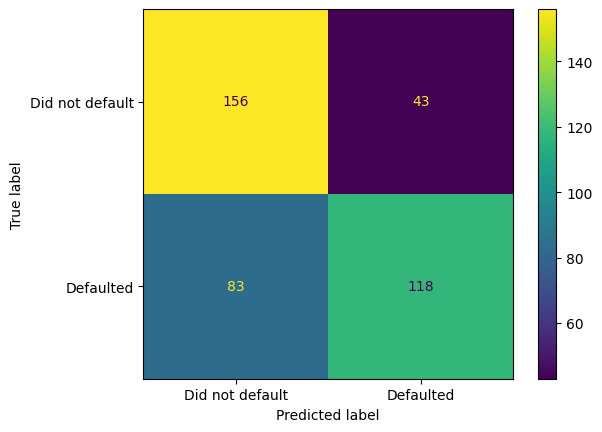

In [164]:
disp = ConfusionMatrixDisplay.from_estimator(
    clf_svm,
    X_test_scaled,
    y_test,
    values_format='d',
    display_labels=['Did not default', 'Defaulted']
)
disp.figure_.savefig('confusion_matrix_pre_gridSearch.png', dpi=300, bbox_inches='tight')

In [165]:
param_grid = {
    'C': [0.5, 1, 10, 100],
    'gamma': ['scale', 1, 0.1, 0.01, 0.001, 0.0001],
    'kernel': ['rbf']
}  

In [166]:
optimal_params = GridSearchCV(SVC(),
                              param_grid,
                              cv=5,
                              scoring='accuracy',
                              verbose=0)

In [167]:
optimal_params.fit(X_train_scaled, y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.5, 1, 10, 100],
                         'gamma': ['scale', 1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             scoring='accuracy')

In [168]:
print(optimal_params.best_params_)


{'C': 1, 'gamma': 0.01, 'kernel': 'rbf'}


In [169]:
clf_svm = SVC(random_state=42, C=optimal_params.best_params_['C'], gamma=optimal_params.best_params_['gamma'])
clf_svm.fit(X_train_scaled, y_train)


SVC(C=1, gamma=0.01, random_state=42)

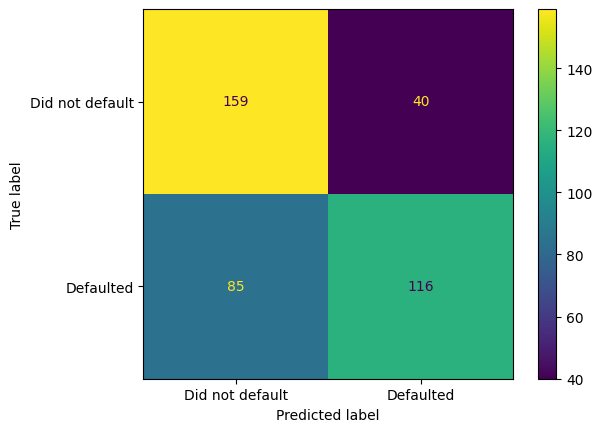

In [170]:
disp = ConfusionMatrixDisplay.from_estimator(
    clf_svm,
    X_test_scaled,
    y_test,
    values_format='d',
    display_labels=['Did not default', 'Defaulted']
)
disp.figure_.savefig('confusion_matrix_post_gridSearch.png', dpi=300, bbox_inches='tight')


In [171]:
len(df_downsample.columns)

24

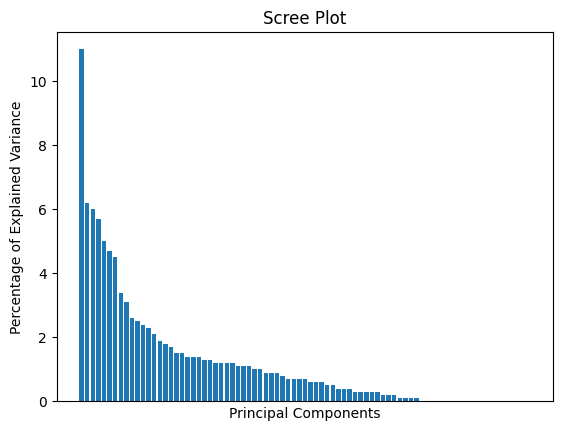

In [172]:
pca = PCA()
X_train_pca = pca.fit_transform(X_train_scaled)

per_var = np.round(pca.explained_variance_ratio_* 100, decimals=1)
labels = [str(x) for x in range(1, len(per_var)+1)]

plt.bar(x=range(1,len(per_var)+1), height=per_var)
plt.tick_params(
    axis='x',
    which='both',
    bottom=False,
    labelbottom=False
)
plt.ylabel('Percentage of Explained Variance')
plt.xlabel('Principal Components')
plt.title('Scree Plot')
plt.savefig('scree_plot.png', dpi=300, bbox_inches='tight')
plt.show()

In [173]:
train_pc1_coords = X_train_pca[:, 0]
train_pc2_coords = X_train_pca[:, 1]

pca_train_scaled = scale(np.column_stack((train_pc1_coords, train_pc2_coords)))

param_grid = [
    {'C': [1, 10, 100, 1000],
     'gamma': ['scale', 1, 0.1, 0.01, 0.001, 0.0001],
     'kernel': ['rbf']

    }
]

optimal_params = GridSearchCV(
    SVC(),
    param_grid,
    cv=5,
    scoring='accuracy',
    verbose=0
)

optimal_params.fit(pca_train_scaled, y_train)
print(optimal_params.best_params_)

{'C': 1000, 'gamma': 1, 'kernel': 'rbf'}


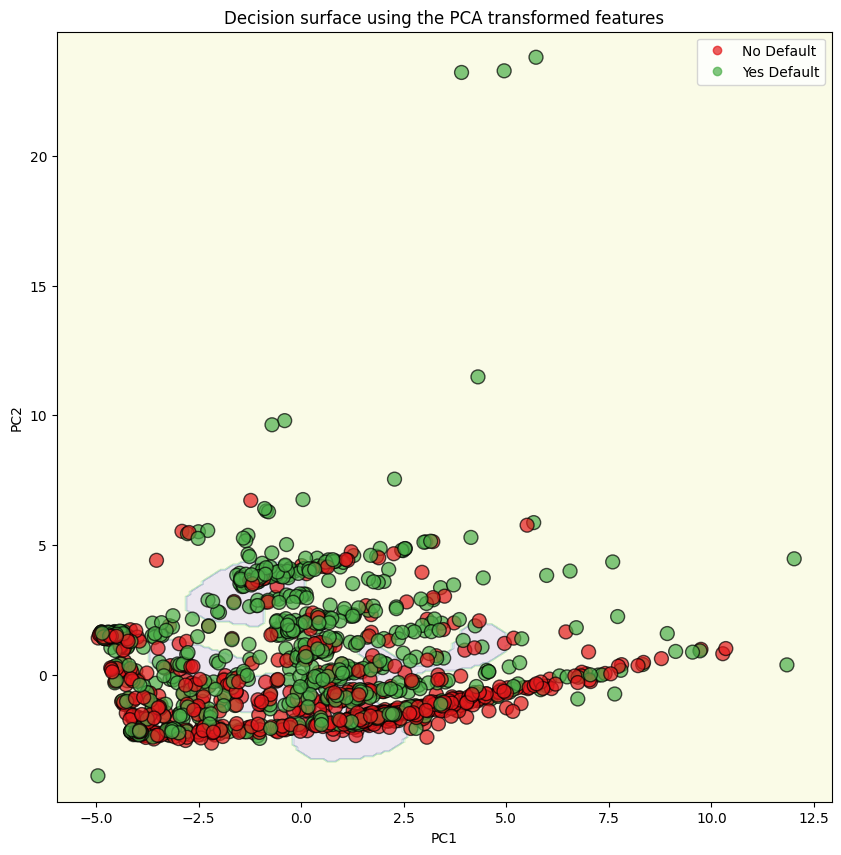

In [174]:
clf_svm = SVC(random_state=42, C=optimal_params.best_params_['C'], gamma=optimal_params.best_params_['gamma'])
clf_svm.fit(pca_train_scaled, y_train)

X_test_pca = pca.transform(X_train_scaled)
test_pc1_coords = X_test_pca[:, 0]
test_pc2_coords = X_test_pca[:, 1]

x_min = test_pc1_coords.min() - 1
x_max = test_pc1_coords.max() + 1

y_min = test_pc2_coords.min() - 1
y_max = test_pc2_coords.max() + 1

xx, yy = np.meshgrid(np.arange(start=x_min, stop=x_max, step=0.1),
                     np.arange(start=y_min, stop=y_max, step=0.1))

Z = clf_svm.predict(np.column_stack((xx.ravel(), yy.ravel())))
Z = Z.reshape(xx.shape)

fig, ax = plt.subplots(figsize=(10,10))
ax.contourf(xx, yy, Z, alpha=0.1)

cmap = colors.ListedColormap(['#e41a1c', '#4daf4a'])

scatter = ax.scatter(test_pc1_coords, test_pc2_coords, c=y_train,
                     cmap=cmap,
                     s=100,
                     edgecolors='k',
                     alpha=0.7)

legend = ax.legend(scatter.legend_elements()[0],
                   scatter.legend_elements()[1],
                   loc="upper right")
legend.get_texts()[0].set_text("No Default")
legend.get_texts()[1].set_text("Yes Default")

ax.set_ylabel("PC2")
ax.set_xlabel("PC1")
ax.set_title('Decision surface using the PCA transformed features')
plt.savefig('decision_surface_pca.png', dpi=300, bbox_inches='tight')
plt.show()

Optimizing kernel: linear
Best parameters for linear: {'C': 1, 'gamma': 'scale', 'kernel': 'linear'}
Optimizing kernel: poly
Best parameters for poly: {'C': 10, 'gamma': 0.01, 'kernel': 'poly'}
Optimizing kernel: rbf
Best parameters for rbf: {'C': 1, 'gamma': 0.01, 'kernel': 'rbf'}
Optimizing kernel: sigmoid
Best parameters for sigmoid: {'C': 100, 'gamma': 0.001, 'kernel': 'sigmoid'}

Kernel Comparison Results:
    Kernel Accuracy Precision  Recall F1-Score Runtime Best C Best Gamma
0   linear   0.6525    0.7095  0.5224   0.6017  0.2470      1      scale
1     poly   0.6700    0.7226  0.5572   0.6292  0.0603     10       0.01
2      rbf   0.6875    0.7436  0.5771   0.6499  0.0606      1       0.01
3  sigmoid   0.6450    0.7007  0.5124   0.5920  0.0888    100      0.001


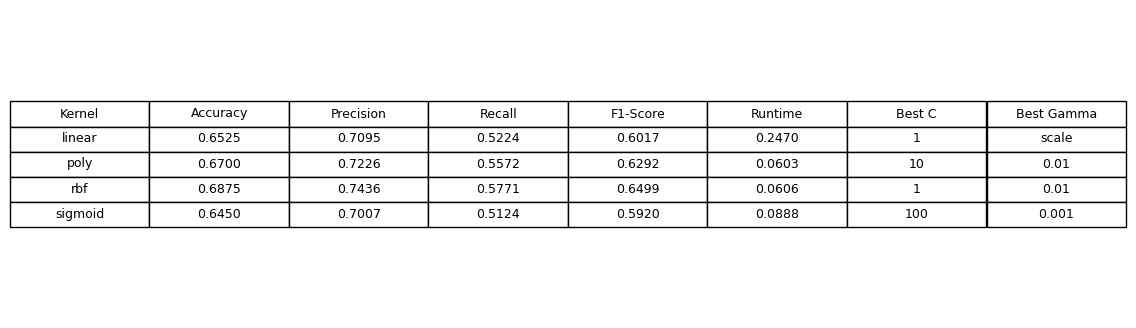

In [177]:
# Import additional required libraries
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
import time

kernels = ['linear', 'poly', 'rbf', 'sigmoid']
results = []

for kernel in kernels:
    print(f"Optimizing kernel: {kernel}")
    
    param_grid = {
        'C': [0.1, 1, 10, 100],
        'gamma': [0.001, 0.01, 0.1, 1] if kernel != 'linear' else ['scale'],
        'kernel': [kernel]
    }
    
    grid_search = GridSearchCV(SVC(random_state=42), param_grid, cv=5, scoring='accuracy', verbose=0)
    grid_search.fit(X_train_scaled, y_train)
    
    best_params = grid_search.best_params_
    print(f"Best parameters for {kernel}: {best_params}")
    
    start_time = time.time()
    clf = SVC(random_state=42, C=best_params['C'], gamma=best_params.get('gamma', 'scale'), kernel=kernel)
    clf.fit(X_train_scaled, y_train)
    end_time = time.time()
    
    y_pred = clf.predict(X_test_scaled)
    acc = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, zero_division=0)
    recall = recall_score(y_test, y_pred, zero_division=0)
    f1 = f1_score(y_test, y_pred, zero_division=0)
    
    results.append({
        'Kernel': kernel,
        'Accuracy': f"{acc:.4f}",
        'Precision': f"{precision:.4f}",
        'Recall': f"{recall:.4f}",
        'F1-Score': f"{f1:.4f}",
        'Runtime': f"{(end_time - start_time):.4f}",
        'Best C': str(best_params['C']),
        'Best Gamma': str(best_params.get('gamma', 'N/A'))
    })

results_df = pd.DataFrame(results)
print("\nKernel Comparison Results:")
print(results_df)

fig, ax = plt.subplots(figsize=(12, 4))
ax.axis('off')

table = ax.table(cellText=results_df.values,
                colLabels=results_df.columns,
                cellLoc='center',
                loc='center')

table.auto_set_font_size(False)
table.set_fontsize(9)
table.scale(1.2, 1.5)

plt.savefig('kernel_comparison_results.png', 
            dpi=300,
            bbox_inches='tight',
            pad_inches=0.1)
plt.show()